
#  This script contains the following:
1. Importing Visualization Libraries and Data
2. Data Cleaning
3. Exploring Relationships

 



# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Display chart in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create path
path = r"C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 6"

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, 'Agri_food_emission_analysis', '02_Data', 'Prepared data','agri_food_emission.csv'))

# 2. Data Cleaning

In [5]:
# Check number of raws and columns
df.shape

(4546, 31)

In [6]:
# Check name of columns
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [7]:
# Rename the column name total_emission
df.rename(columns = {'total_emission' : 'Total Emission'},inplace = True)

In [8]:
# Creat a new variable that represents total population 
df['Total Population']=df['Total Population - Male'] + df['Total Population - Female'] 

In [9]:
df.dtypes

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

In [10]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Total Emission,Average Temperature °C,Total Population
0,Albania,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,...,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750,3295065.0
1,Albania,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,...,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772,-0.461500,3302082.0
2,Albania,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,...,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572,0.318250,3303739.0
3,Albania,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,...,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272,0.270500,3300710.0
4,Albania,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,...,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672,1.202667,3293999.0


###  Missing Values Check

In [11]:
# Check for missing values
df.isnull().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

There is no missing value.

### Duplicates Check

In [12]:
# Finding duplicates
df_dups=df[df.duplicated()]

In [13]:
df_dups.shape

(0, 32)

There is no duplicate 

### Mixed type Data Check

In [14]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

There is no mixed-type data.

# 3. Exploring Relationships

In [15]:
# Creat a subset excluding columns not relevant 
sub=df[['Rural population', 'Urban population', 'Total Population',
        'Total Emission',
       'Average Temperature °C']]

In [16]:
sub

,Rural population,Urban population,Total Population,Total Emission,Average Temperature °C
0,2086075.0,1195379.0,3295065.0,3475.291240,0.735750
1,2073348.0,1202083.0,3302082.0,5680.135772,-0.461500
2,2033508.0,1207079.0,3303739.0,5221.131572,0.318250
3,1983942.0,1205641.0,3300710.0,5316.973272,0.270500
4,1936056.0,1204539.0,3293999.0,5564.287672,1.202667
...,...,...,...,...,...
4541,10934468.0,5215894.0,14452705.0,98491.026347,1.120250
4542,11201138.0,5328766.0,14751102.0,97159.311553,0.046500
4543,11465748.0,5447513.0,15052183.0,97668.308205,0.516333
4544,11725970.0,5571525.0,15354607.0,98988.062799,0.985667


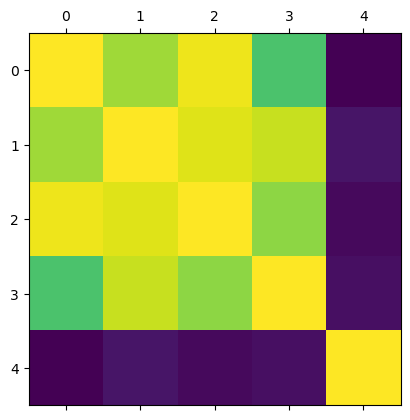

In [17]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

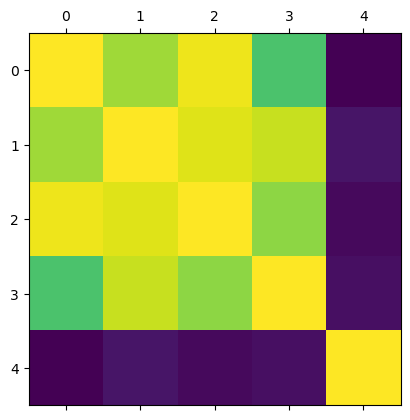

In [18]:
# Save figure in the working directory 
plt.matshow(sub.corr())
plt.savefig("out.png") 



Text(0.5, 1.0, 'Correlation Matrix')

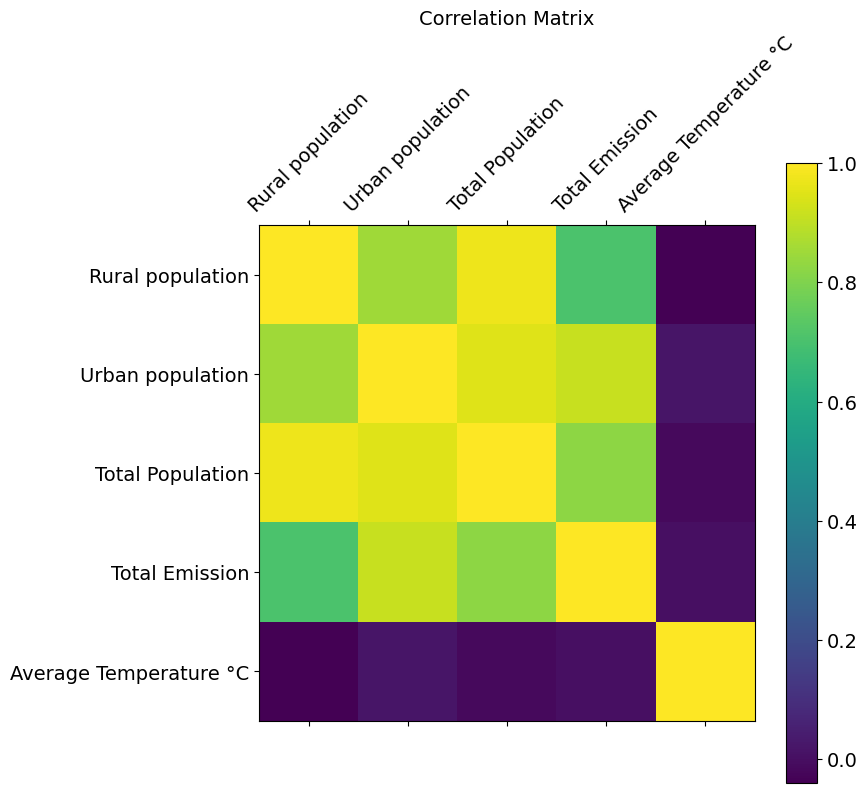

In [19]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

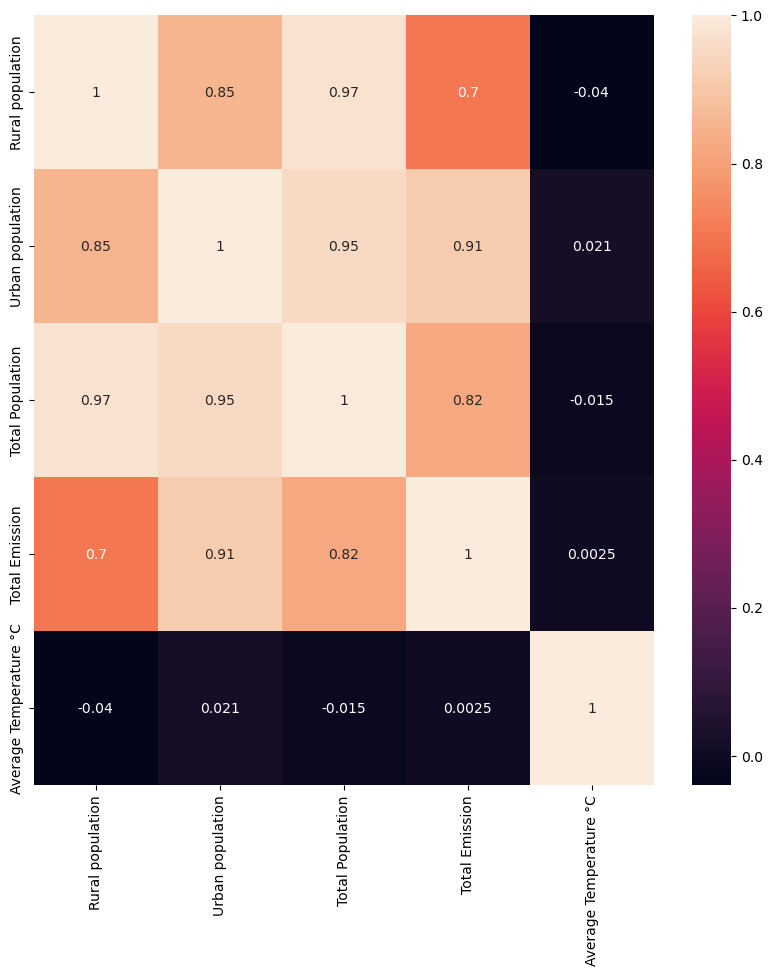

In [20]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The most interesting correlation for my project is the correlation between emission and average temprature . The map shows that this correlation is rather weak. However, one can further investigate that whether instead of using total emission using per capita emission would be a more appropriate method to explore the relationship between emission and temprature change.

In [21]:
# Creat a new variable that represents per capita emission 
sub['Per Capita Emission']=(sub['Total Emission']/(sub['Total Population']))


C:\Users\Lemlem TH\AppData\Local\Temp\ipykernel_20040\2395047624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Per Capita Emission']=(sub['Total Emission']/(sub['Total Population']))


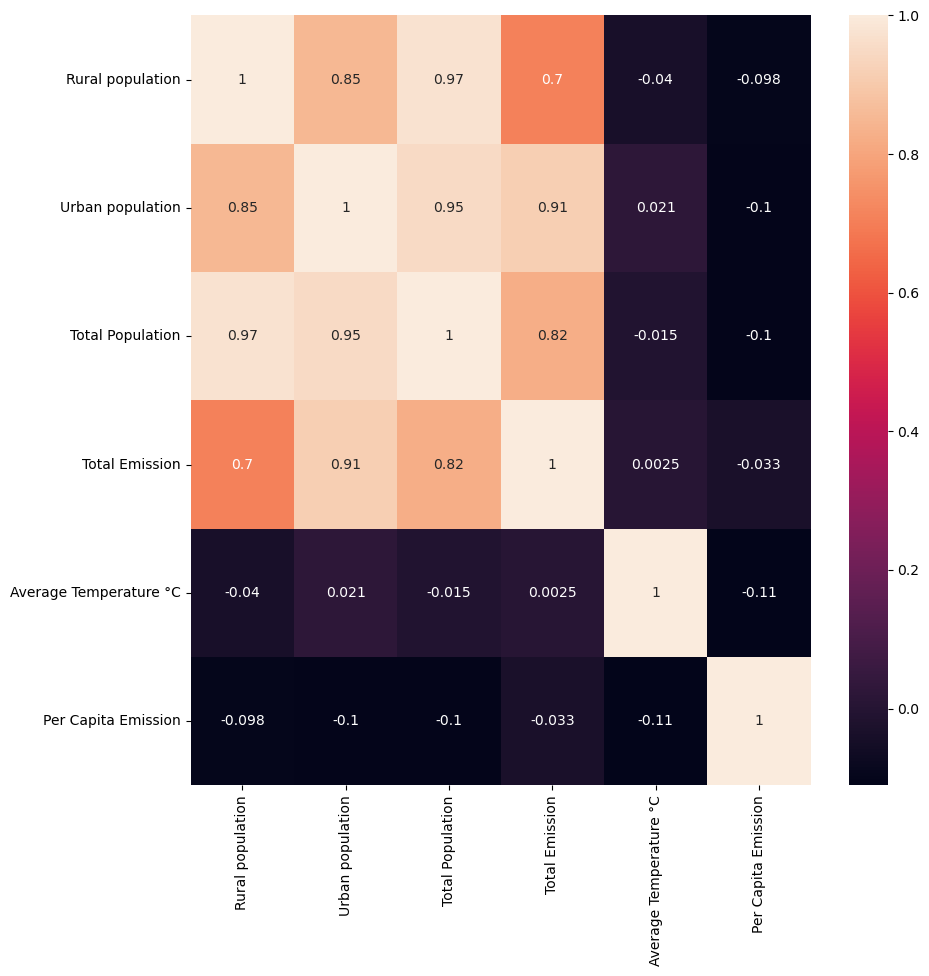

In [22]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

However, again the data does not show any strong relationship between per capita emissiona and locan temprature change.

### Scatterplots

C:\Users\Lemlem TH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


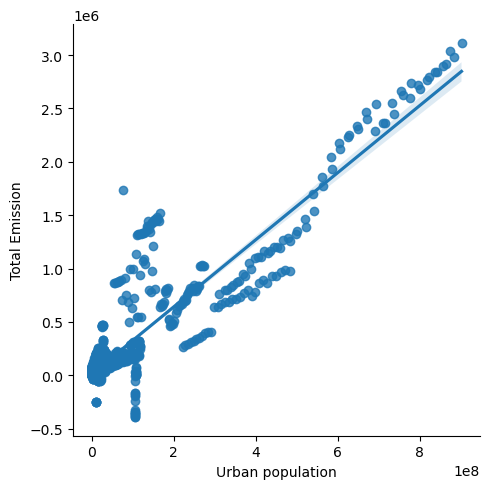

In [23]:
# Create a scatterplot for the "Urban population" and "Total Emission" columns in seaborn

sns.lmplot(x = 'Urban population', y = 'Total Emission', data = sub)

As it is expected the relationship between urban population and total emission is somehow linearly related. Except very few oulier values most of the data points are close to the line.

C:\Users\Lemlem TH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


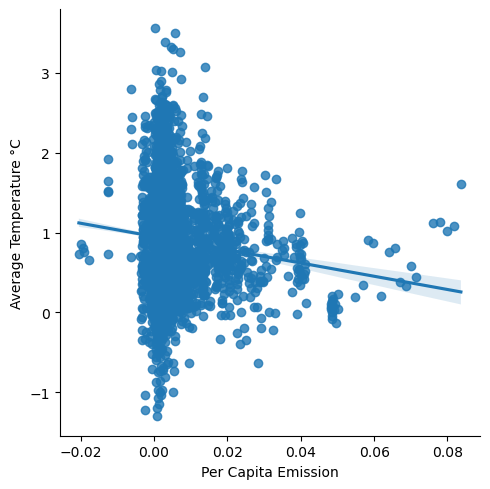

In [24]:
# Create a scatterplot for the "Per Capita Emission" and "Average Temprature" columns in seaborn

sns.lmplot(x = 'Per Capita Emission', y = 'Average Temperature °C', data = sub)

The relationship between per capita emission and average temprature is not linear as expected. It might be that there is a confounding factor affecting this relationship.

### Pair Plots 

C:\Users\Lemlem TH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


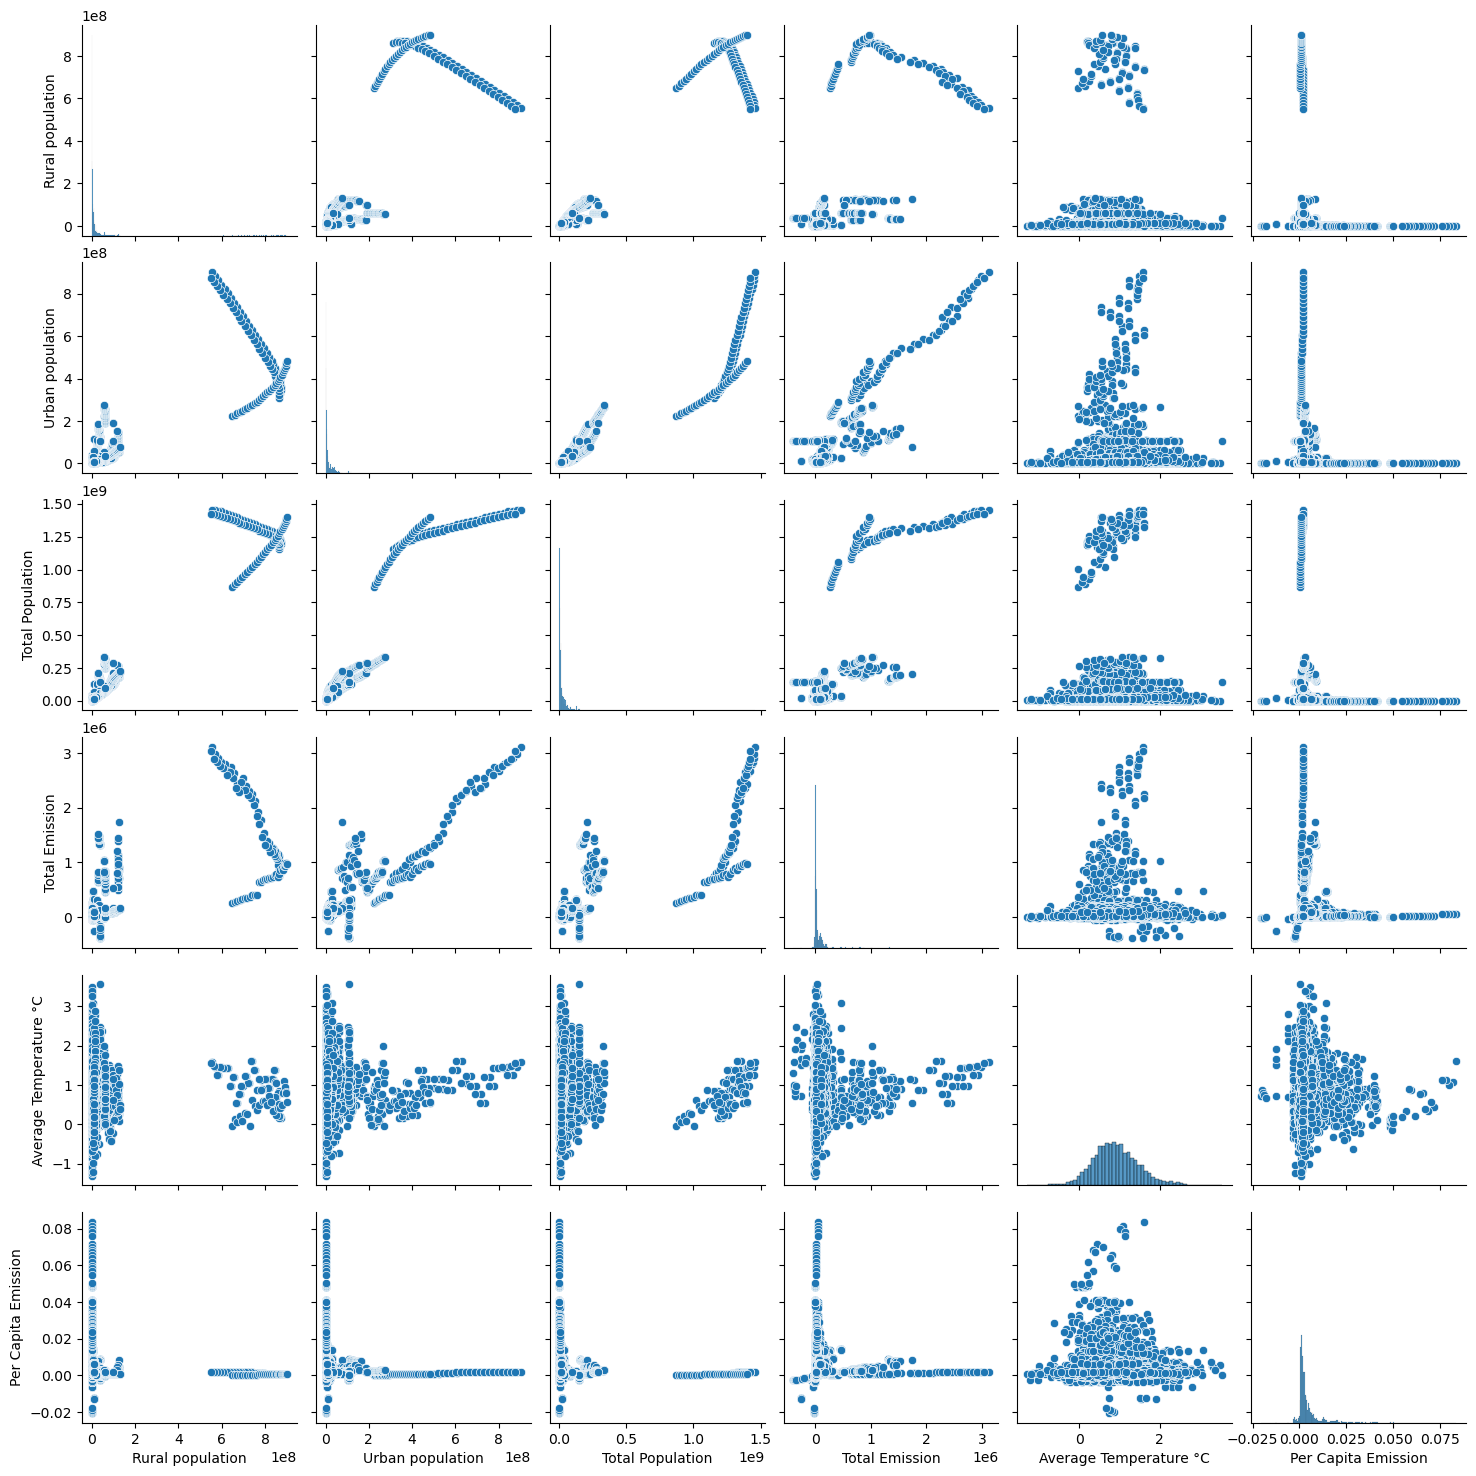

In [25]:
# Create a pair plot 

g = sns.pairplot(sub)

It would be interesting to further explore the relationship between per capita emission and average temprature.

### Categorical Plots

<Axes: xlabel='Per Capita Emission', ylabel='Count'>

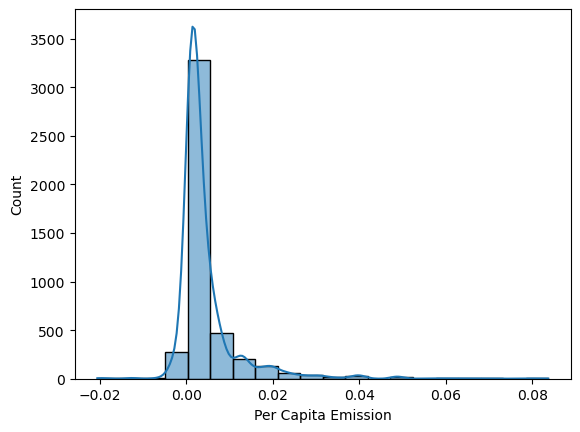

In [26]:
sns.histplot(sub['Per Capita Emission'], bins = 20, kde = True)

In [27]:
sub.loc[sub['Per Capita Emission'] < 0, 'Emission category'] = 'Low'

C:\Users\Lemlem TH\AppData\Local\Temp\ipykernel_20040\1749781371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['Per Capita Emission'] < 0, 'Emission category'] = 'Low'


In [28]:
sub.loc[(sub['Per Capita Emission'] >= 0.00) & (sub['Per Capita Emission'] < 0.02), 'Emission category'] = 'Average'

In [29]:
sub.loc[sub['Per Capita Emission'] >= 0.02, 'Emission category'] = 'High'

In [30]:
sub['Emission category'].value_counts(dropna = False)

Emission category
Average    4108
Low         233
High        205
Name: count, dtype: int64

C:\Users\Lemlem TH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


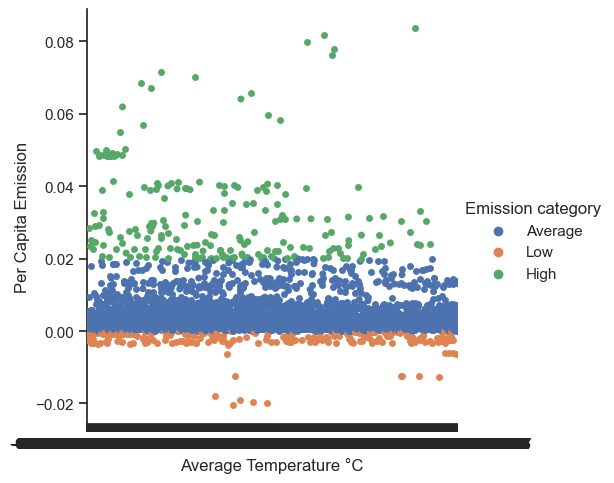

In [31]:
# Create a categorical plot in seaborn using the Emission categories created above

sns.set(style="ticks")
g = sns.catplot(x="Average Temperature °C", y="Per Capita Emission", hue="Emission category", data=sub)

I would say there is not a well defined relationship.There are cases where the per capita emission is low and the temprature change covers the whole range from low to high. The same is true for average and high category emissions.

From this visual anylsis I would say that the relationship between emission and temprature are not linear as expected. I would suggest to do further analysis to see if the relationship is confounded by another varible. Or to say if I need to control for additional variables to identify the relationship between emission and temprature. 